Number of Hotels: 16
Number of Reviews: 19964


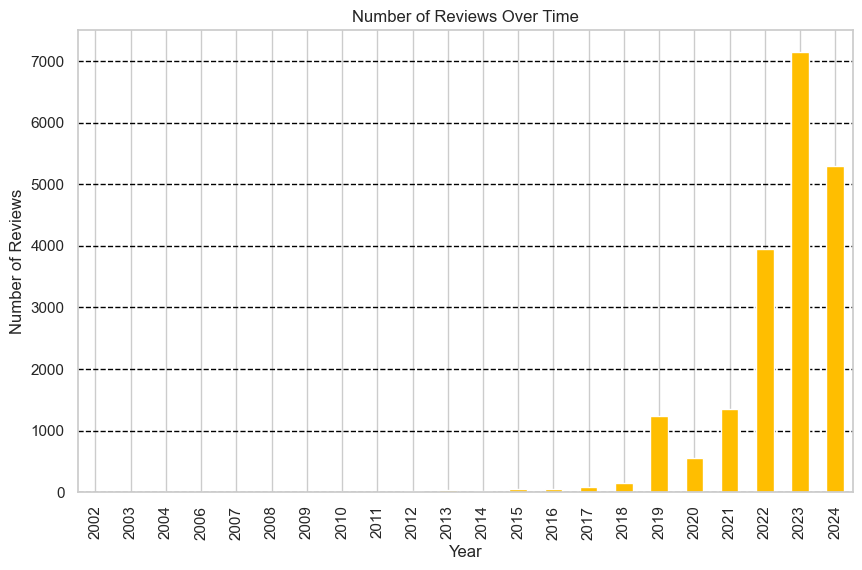

/var/folders/8x/n5mjk3bs7tjc_2kc5wbk_ft00000gn/T/ipykernel_36788/2613229994.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=review_counts.index, x=review_counts.values, palette=['black', '#ffbe00']*len(review_counts))
/var/folders/8x/n5mjk3bs7tjc_2kc5wbk_ft00000gn/T/ipykernel_36788/2613229994.py:38: UserWarning: The palette list has more values (32) than needed (16), which may not be intended.
  sns.barplot(y=review_counts.index, x=review_counts.values, palette=['black', '#ffbe00']*len(review_counts))


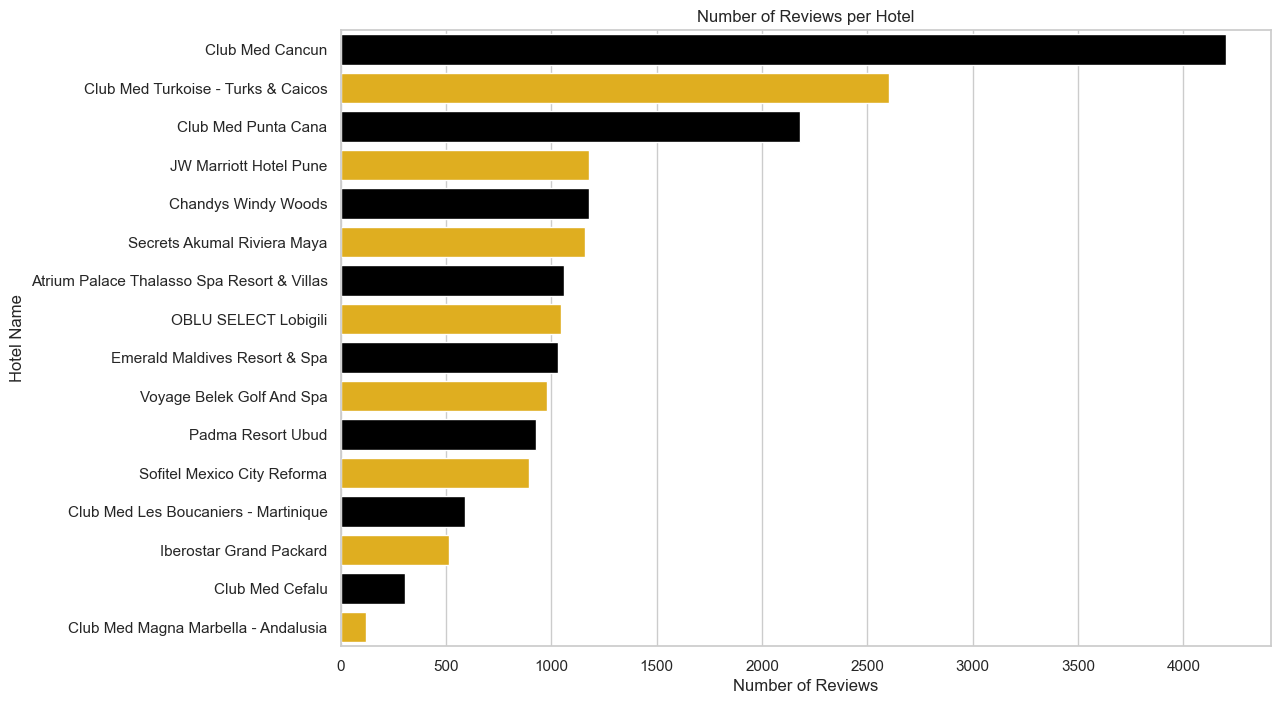

In [661]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import re
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
from collections import defaultdict

data = pd.read_excel('/Users/vaishnavimurthys/Desktop/Wordnerds/Hotel-Data.xlsx', header=1)
data.columns = ['Review Date', 'Hotel Name', 'Region', 'Trip Type', 'Overall Rating', 
                'Cleanliness Rating', 'Location Rating', 'Rooms Rating', 'Sleep Quality Rating', 
                'Value Rating', 'Verbatim', 'Sentiment Score', 'Booking & Pre-arrival', 
                'Arrival & Check-In', 'Room Experience', 'Service Experience', 
                'Facilities & Experiences', 'Dining & Beverage', 'Post-Stay & Retention']
data['Review Date'] = pd.to_datetime(data['Review Date'])

#EDA
num_hotels = data['Hotel Name'].nunique()
num_reviews = data.shape[0]
print(f"Number of Hotels: {num_hotels}")
print(f"Number of Reviews: {num_reviews}")

plt.figure(figsize=(10,6))
data.groupby(data['Review Date'].dt.to_period("Y")).size().plot(kind='bar', color='#ffbe00')
plt.title("Number of Reviews Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', color='black') 
plt.show()

plt.figure(figsize=(12,8))
review_counts = data['Hotel Name'].value_counts()
sns.barplot(y=review_counts.index, x=review_counts.values, palette=['black', '#ffbe00']*len(review_counts))
plt.title("Number of Reviews per Hotel")
plt.xlabel("Number of Reviews")
plt.ylabel("Hotel Name")
plt.show()

trip types over time and trip types wrt hotels(?)

2.comparision of hotels: Analyzing hotel’s ratings against competitors to understand the standing in the market. for identifying strengths and weaknesses.
Analyzing competitors’ strengths can provide insights into best practices that could be adopted.

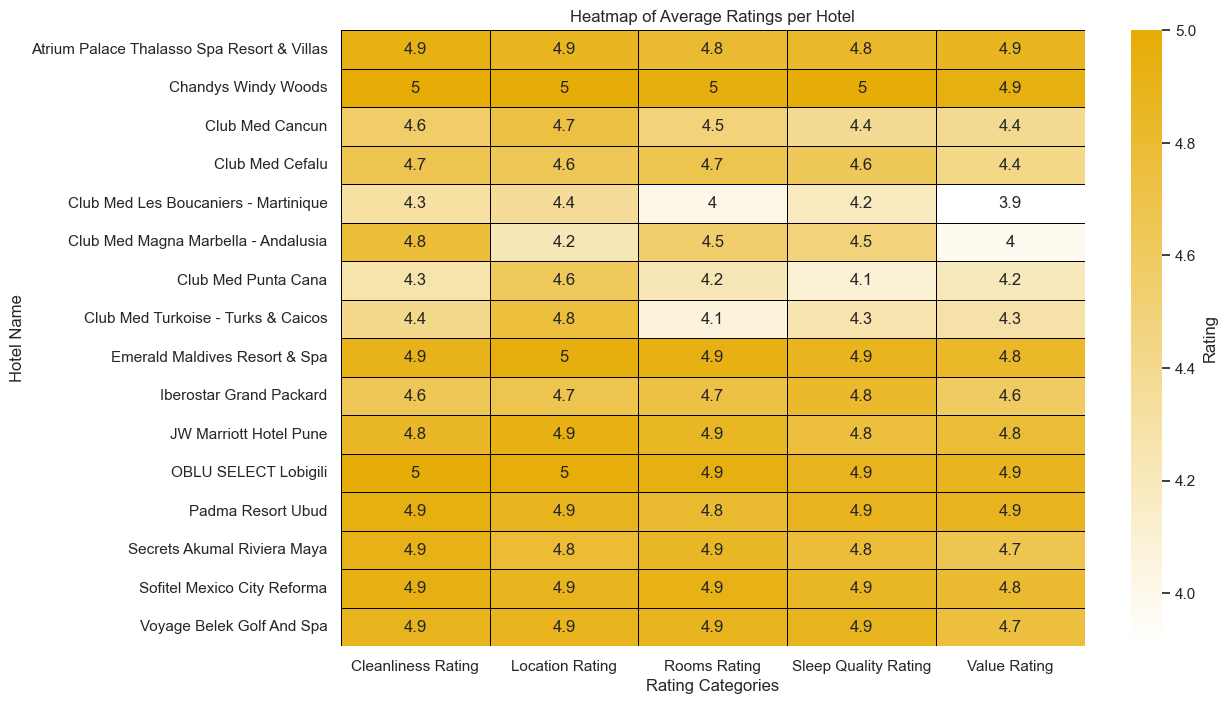

In [662]:
rating_columns = ['Cleanliness Rating', 'Location Rating', 'Rooms Rating', 
                  'Sleep Quality Rating', 'Value Rating', 'Overall Rating']
rating_columns_for_heat_map = ['Cleanliness Rating', 'Location Rating', 'Rooms Rating', 
                  'Sleep Quality Rating', 'Value Rating']
data[rating_columns] = data[rating_columns].apply(pd.to_numeric, errors='coerce')
data[rating_columns_for_heat_map] = data[rating_columns_for_heat_map].apply(pd.to_numeric, errors='coerce')

heat_map = data.pivot_table(values=rating_columns_for_heat_map, index='Hotel Name', aggfunc='mean')
custom_cmap = LinearSegmentedColormap.from_list('custom_yellow', ['white', '#e6ac05'])


plt.figure(figsize=(12, 8))
sns.heatmap(heat_map, annot=True, cmap=custom_cmap, linewidths=0.5, cbar_kws={"label": "Rating"},
            linecolor='black')  
plt.title('Heatmap of Average Ratings per Hotel')
plt.xlabel('Rating Categories')  
plt.ylabel('Hotel Name') 
plt.show()

martiniqua-hotel(from this)

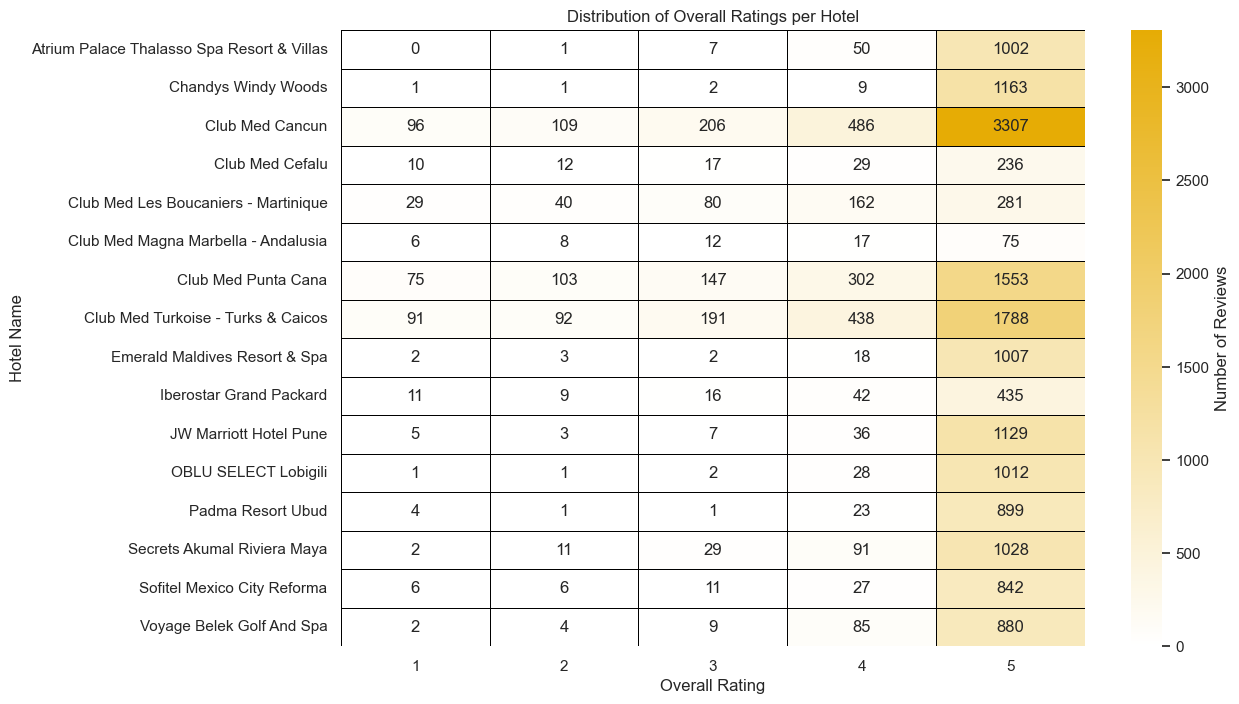

In [663]:
overall_rating_per_hotel = data.groupby(['Hotel Name', 'Overall Rating']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(overall_rating_per_hotel, cmap=custom_cmap, annot=True, fmt='d', 
            cbar_kws={'label': 'Number of Reviews'}, linewidths=0.5, linecolor='black')
plt.title('Distribution of Overall Ratings per Hotel')
plt.xlabel('Overall Rating')
plt.ylabel('Hotel Name')
plt.show()

andalusia, martinique from this

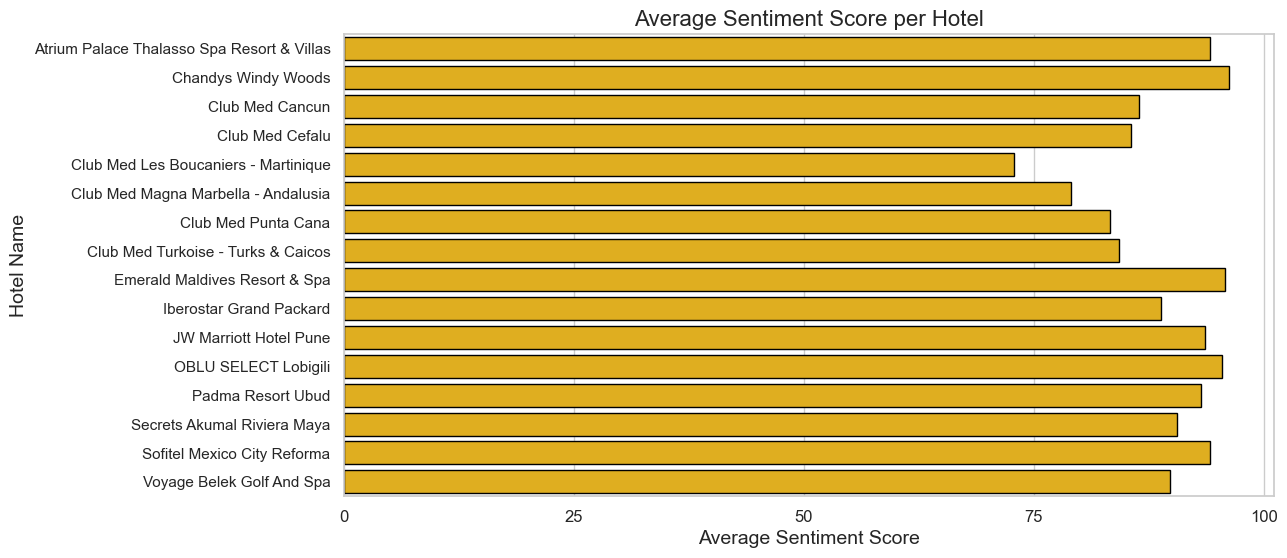

In [664]:
sentiment_scores = data.groupby('Hotel Name')['Sentiment Score'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='Sentiment Score', y='Hotel Name', data=sentiment_scores, 
            color='#ffbe00', edgecolor='black')  # Use #ffbe00 for bars and black for edges
plt.title('Average Sentiment Score per Hotel', fontsize=16)
plt.xlabel('Average Sentiment Score', fontsize=14)
plt.ylabel('Hotel Name', fontsize=14)
plt.xticks(ticks=[0, 25, 50, 75, 100], fontsize=12)
plt.show()

sentiment can either be put in number or as positive, nuetral and negative

all above was with respect to hotel, now lets see things wrt customers.
	•	Learning from customer reviews across the industry enables you to enhance the overall guest experience and increase customer loyalty.
    

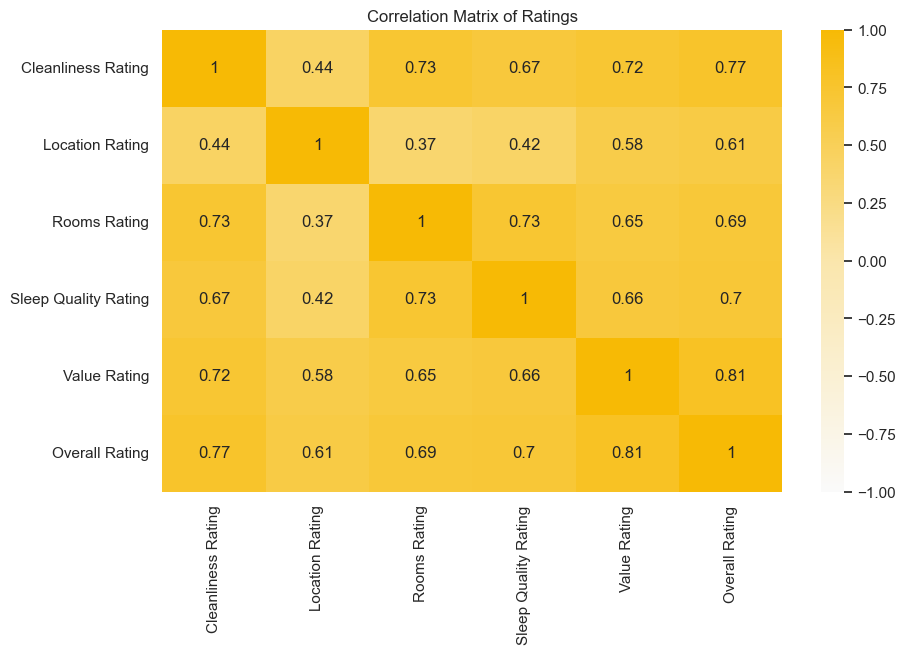

In [665]:
correlation_matrix = data[rating_columns].corr()
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#fafafa', '#fae6ac','#f7ba05'])
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Ratings')
plt.show()

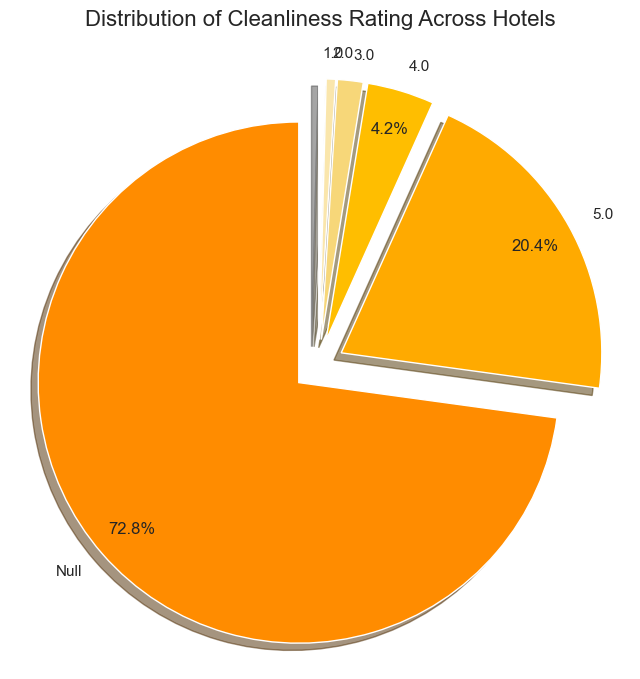

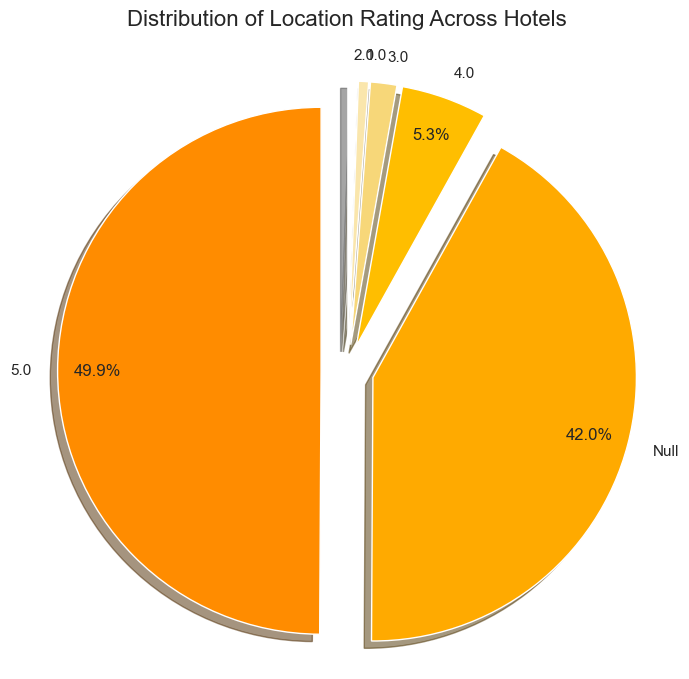

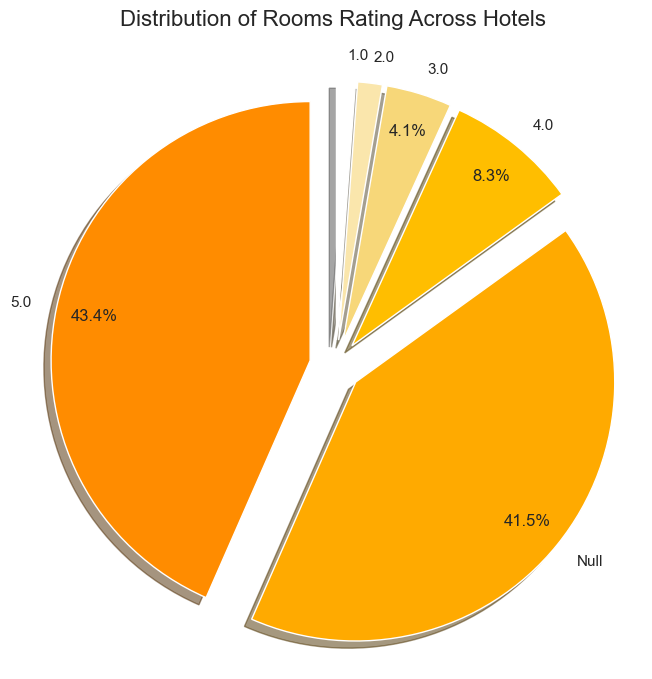

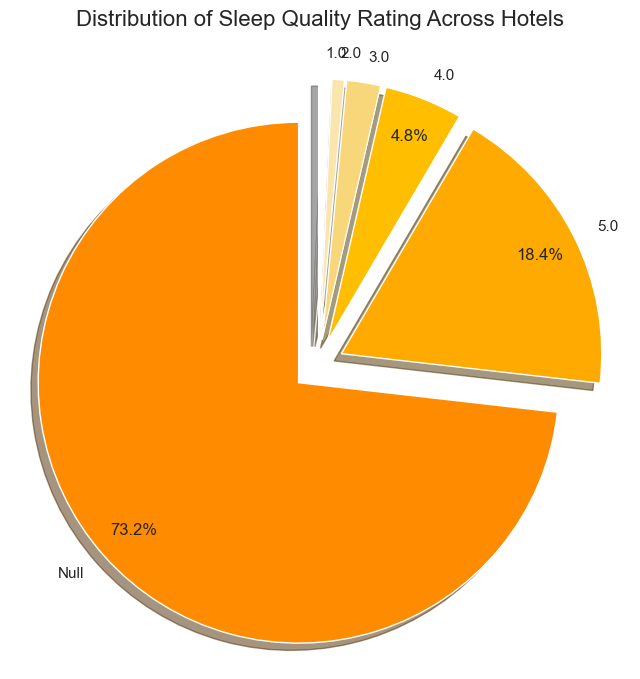

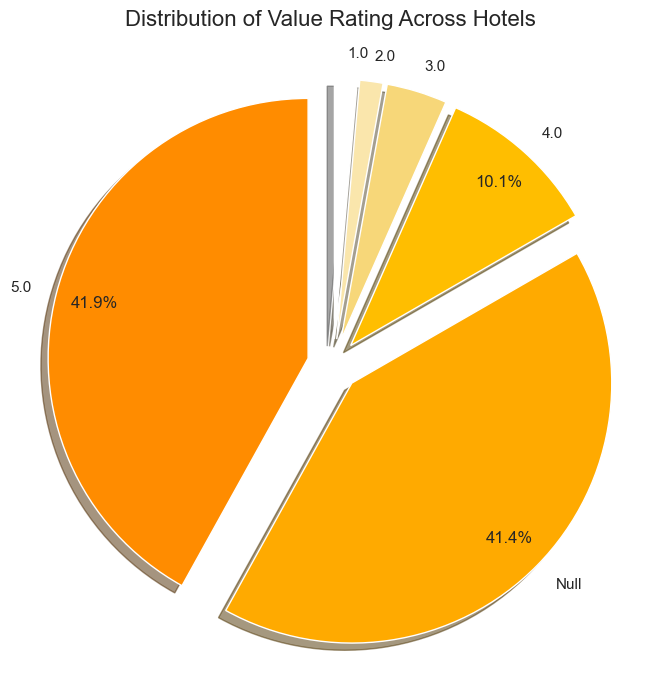

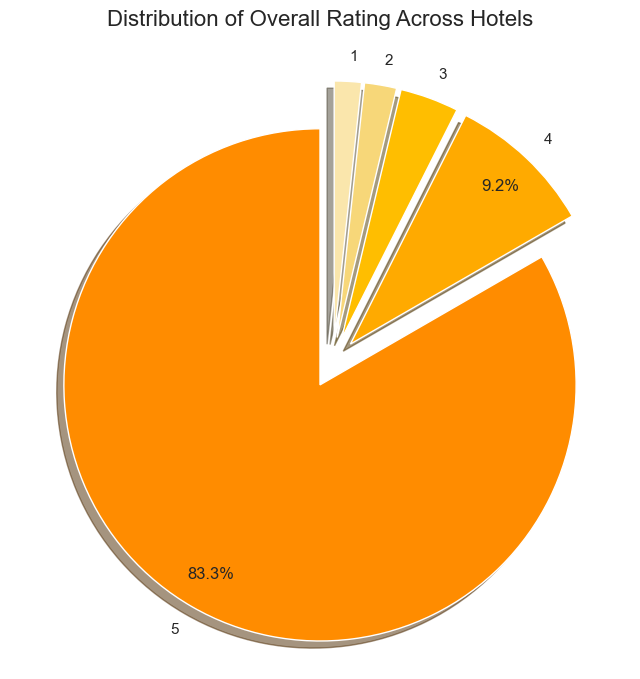

In [666]:
threshold = 4  
for rating in rating_columns:
    filled_ratings = data[rating].fillna('Null')
    rating_distribution = filled_ratings.value_counts()
    
    plt.figure(figsize=(8, 8))

    explode = [0.1 if value > threshold else 0 for value in rating_distribution]

    rating_distribution.plot.pie(
        autopct=lambda p: '{:.1f}%'.format(p) if p > threshold else '',
        colors=custom_colors1[:len(rating_distribution)],
        startangle=90, 
        pctdistance=0.85, 
        labeldistance=1.1,
        explode=explode,
        shadow=True
    )
    plt.title(f'Distribution of {rating} Across Hotels', fontsize=16, pad=20) 
    plt.ylabel('') 
    plt.axis('equal') 
    plt.show()

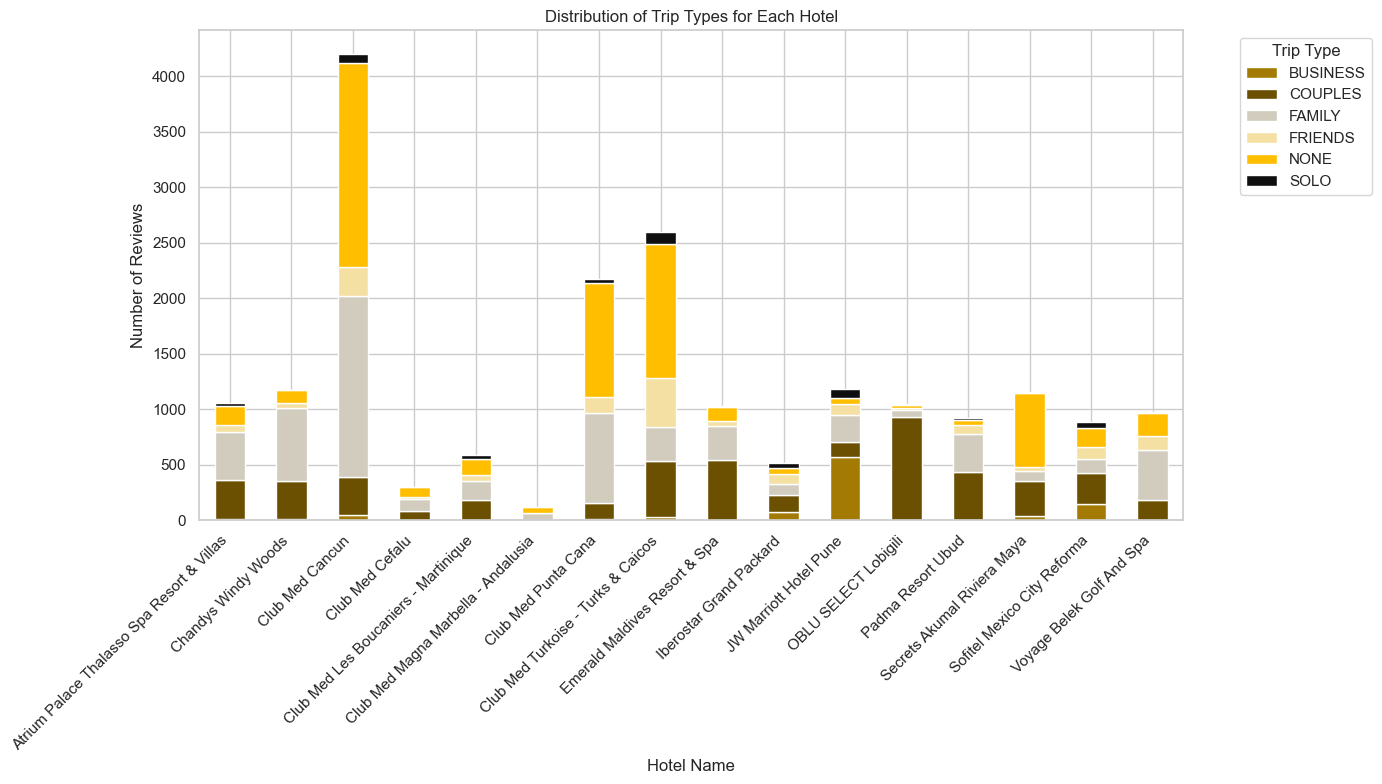

In [667]:
trip_type_counts = data.groupby(['Hotel Name', 'Trip Type']).size().unstack(fill_value=0)

custom_colors2 = ['#a37a03','#6b5002' ,'#d1ccbe','#f5e0a4','#ffbe00', '#0f0f0f']
trip_type_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=custom_colors2[:len(trip_type_counts.columns)])
plt.title('Distribution of Trip Types for Each Hotel')
plt.xlabel('Hotel Name')
plt.ylabel('Number of Reviews')
plt.legend(title='Trip Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()



<Figure size 1000x600 with 0 Axes>

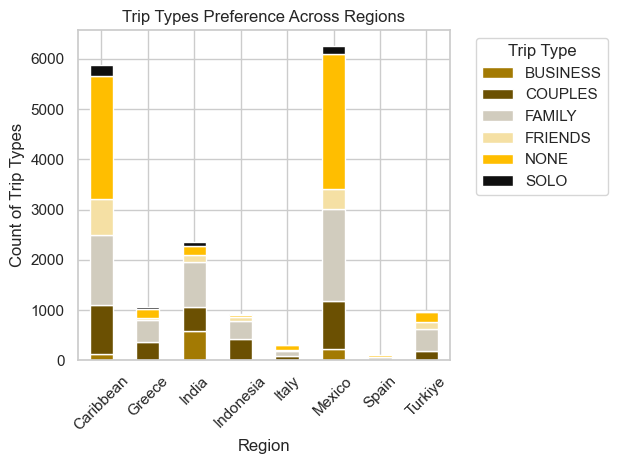

In [668]:

trip_type_region_counts = data.groupby(['Region', 'Trip Type']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
trip_type_region_counts.plot(kind='bar', stacked=True, color=custom_colors2)

plt.title('Trip Types Preference Across Regions')
plt.xlabel('Region')
plt.ylabel('Count of Trip Types')
plt.xticks(rotation=45)
plt.legend(title='Trip Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

No text available for Trip Type: nan


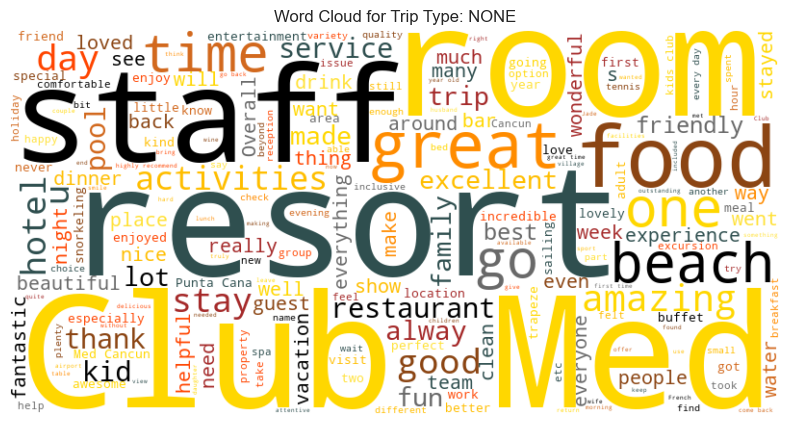

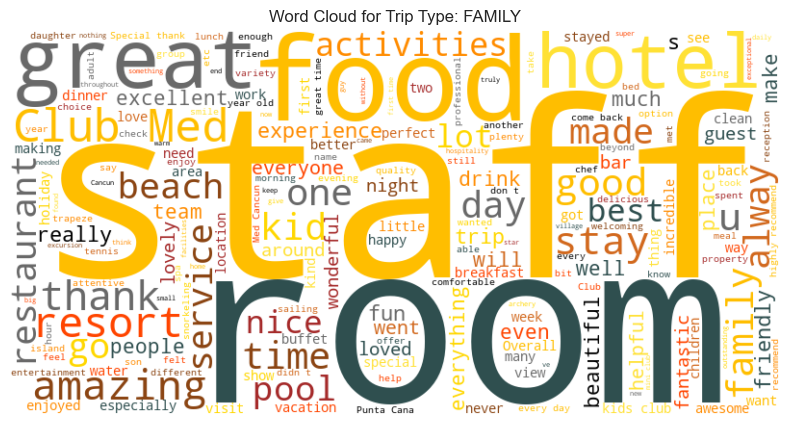

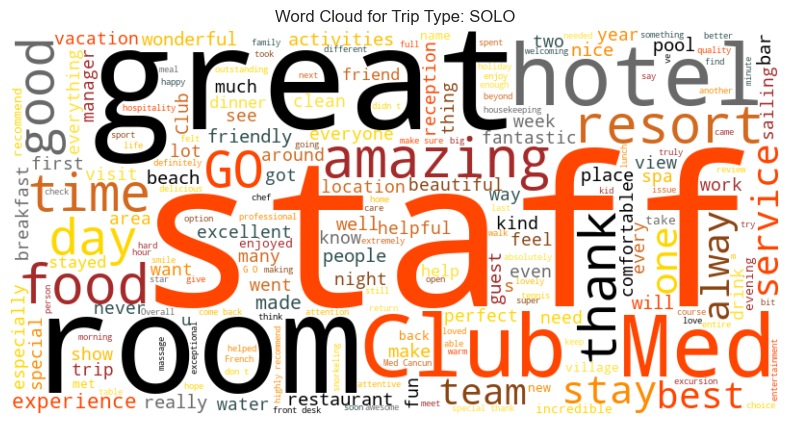

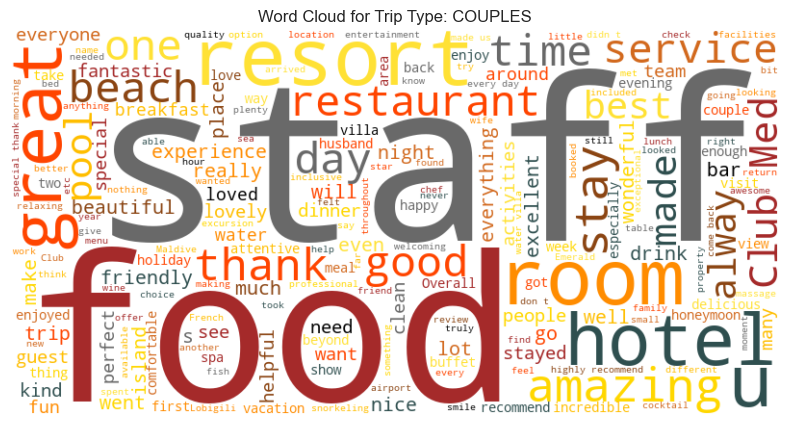

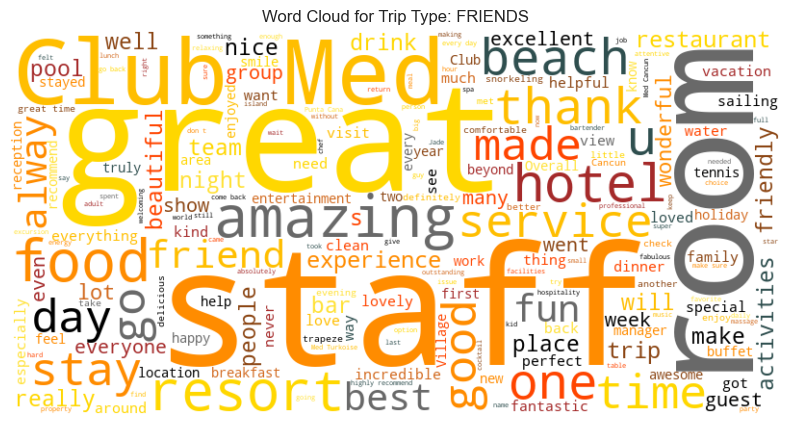

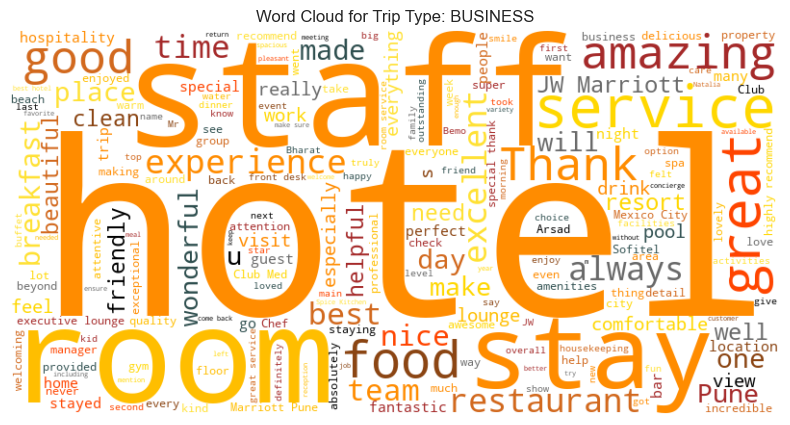

In [669]:

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = [
        '#ffbe00','#ffd700','#ffe135','#ff8c00','#ff4500','#8B4513','#a52a2a','#d2691e','#000000','#696969','#2f4f4f']
    return random.choice(colors)


for trip in data['Trip Type'].unique():
    trip_text = ' '.join(data[data['Trip Type'] == trip]['Verbatim'].dropna())
    
    if trip_text.strip():  
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            color_func=custom_color_func 
        ).generate(trip_text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for Trip Type: {trip}")
        plt.axis('off')
        plt.show()
    else:
        print(f"No text available for Trip Type: {trip}")

	•	For example, family trips might have phrases like “kids club”, “family room”, or “child-friendly”.
	•	Couples might mention phrases like “romantic dinner” or “quiet retreat”.
	•	Business travelers could refer to “meeting room”, “conference center”, or “business trip”.

Common Themes: [('Staff friendly and helpful', 12958), ('Returning customers/plan to return', 3558), ('Quality of room', 2820), ('Restaurants and dining (general)', 2230), ('Restaurants and dining (general); Dining (general)', 1804), ('Dining (general); Restaurants and dining (general)', 1787), ('Value for money', 1507), ('View', 1230), ('First impressions', 1202), ('Airport transfers', 921)]


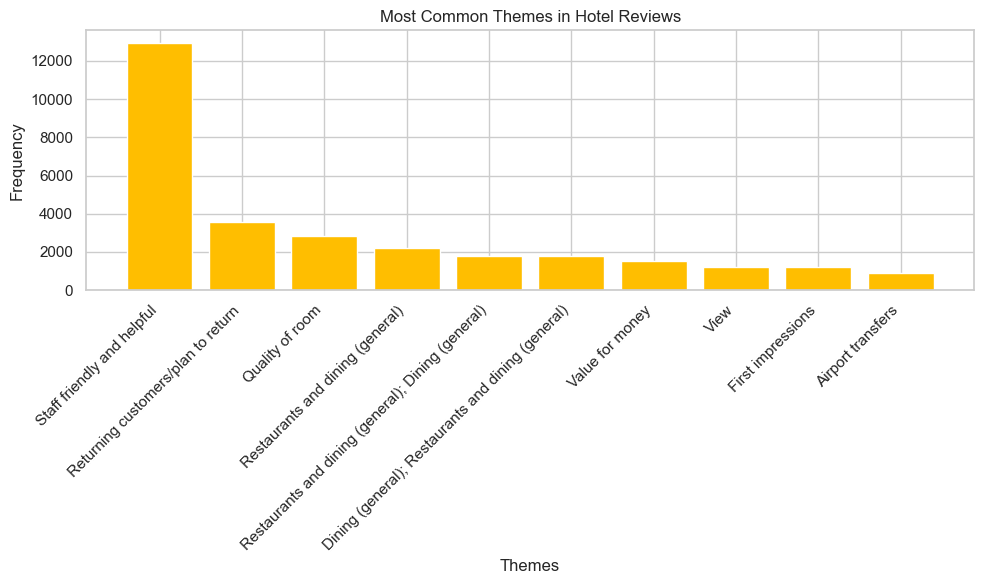

In [670]:
themes_columns = ['Booking & Pre-arrival', 'Arrival & Check-In', 'Room Experience', 'Service Experience', "Facilities & experiences", "Dining & Beverage", "Post-Stay & Retention"]
all_themes = []
existing_columns = [col for col in themes_columns if col in data.columns]

for column in existing_columns:
    all_themes.extend(data[column].dropna().tolist())
themes_counter = Counter(all_themes)
common_themes = themes_counter.most_common(10)


print("Common Themes:", common_themes)
themes, counts = zip(*common_themes)
plt.figure(figsize=(10, 6))
plt.bar(themes, counts,color='#ffbe00')
plt.title('Most Common Themes in Hotel Reviews')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

Hotel Club Med Les Boucaniers - Martinique

In [671]:
df = data[data['Hotel Name'] == 'Club Med Les Boucaniers - Martinique']

/var/folders/8x/n5mjk3bs7tjc_2kc5wbk_ft00000gn/T/ipykernel_36788/1514403115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Review Date'].dt.year


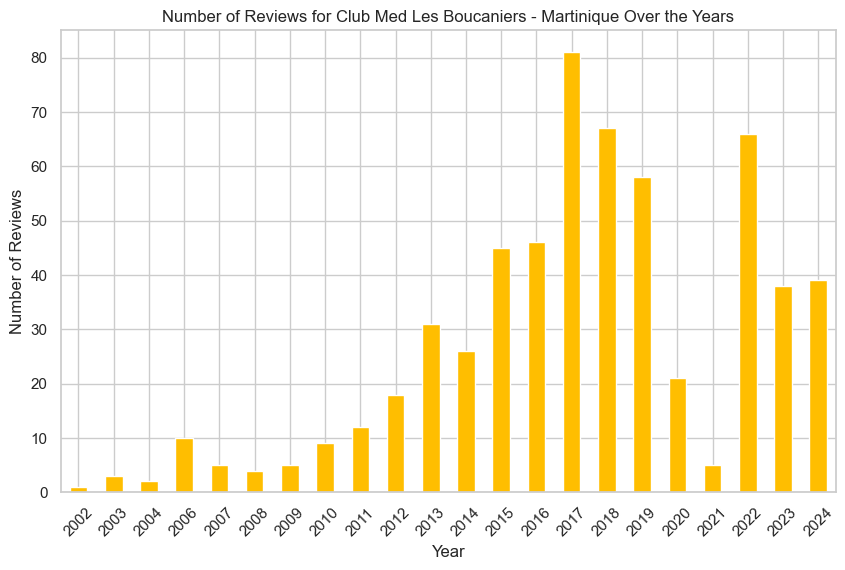

In [672]:
df['Year'] = df['Review Date'].dt.year
bookings_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bookings_per_year.plot(kind='bar', color='#ffbe00')
plt.title('Number of Reviews for Club Med Les Boucaniers - Martinique Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

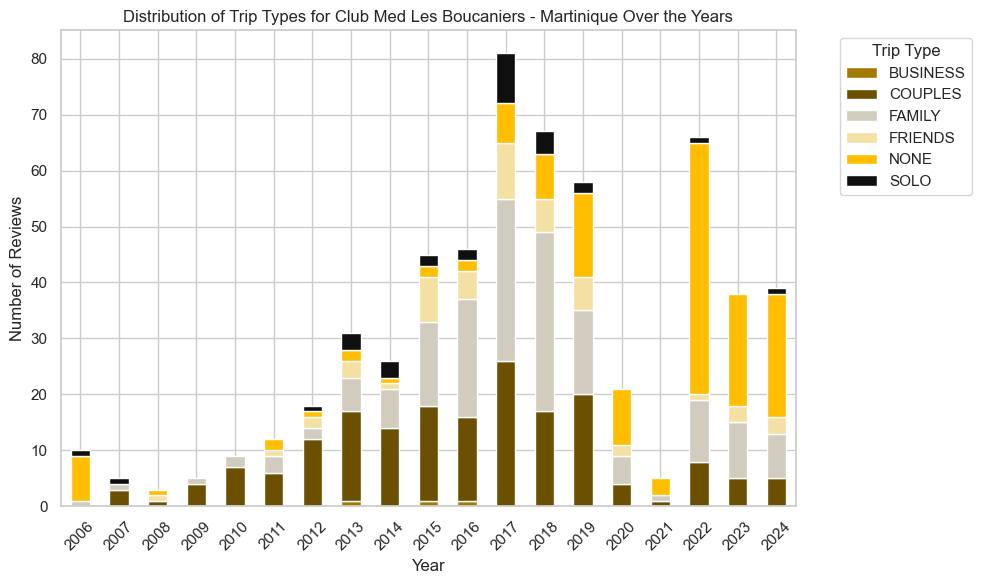

In [673]:
custom_colors2 = ['#a37a03','#6b5002' ,'#d1ccbe','#f5e0a4','#ffbe00', '#0f0f0f']
trip_type_per_year = df.groupby(['Year', 'Trip Type']).size().unstack(fill_value=0)
trip_type_per_year.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors2)

plt.title('Distribution of Trip Types for Club Med Les Boucaniers - Martinique Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Trip Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

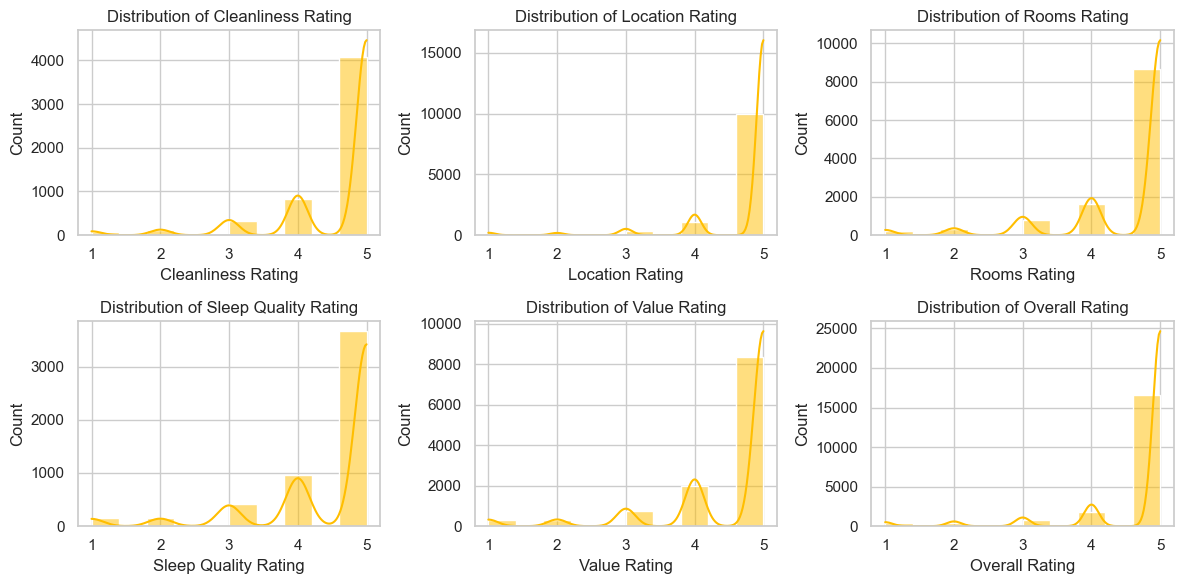

In [674]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(rating_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col].dropna(), bins=10, kde=True, color='#ffbe00')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [675]:
mean_ratings_per_year = df.groupby('Year')['Overall Rating'].mean()
mean_ratings_per_year

Year
2002    4.000000
2003    2.333333
2004    5.000000
2006    3.600000
2007    2.800000
2008    4.750000
2009    4.600000
2010    3.888889
2011    3.750000
2012    4.166667
2013    4.096774
2014    4.461538
2015    3.488889
2016    3.913043
2017    4.530864
2018    4.059701
2019    4.413793
2020    4.190476
2021    5.000000
2022    3.924242
2023    3.526316
2024    3.923077
Name: Overall Rating, dtype: float64

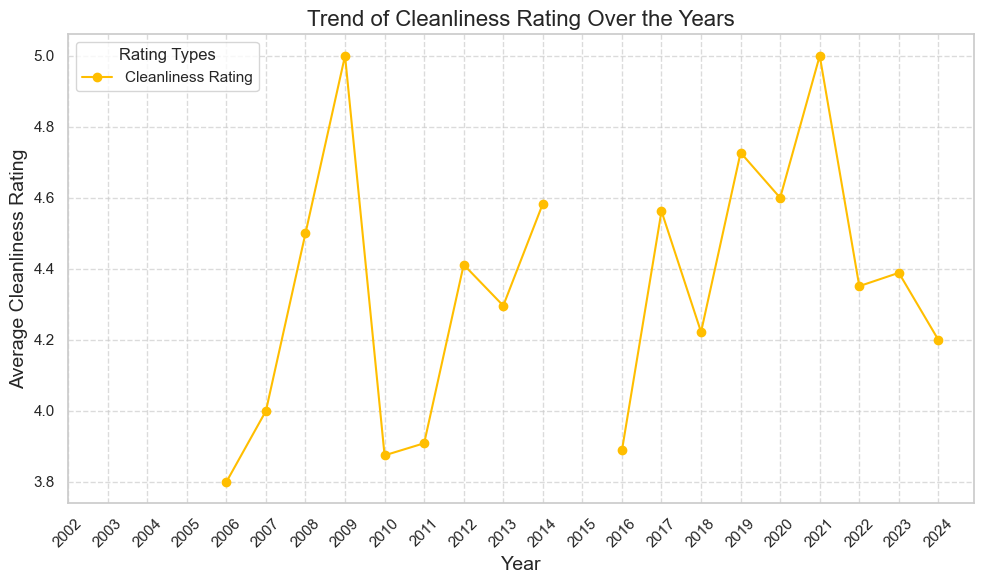

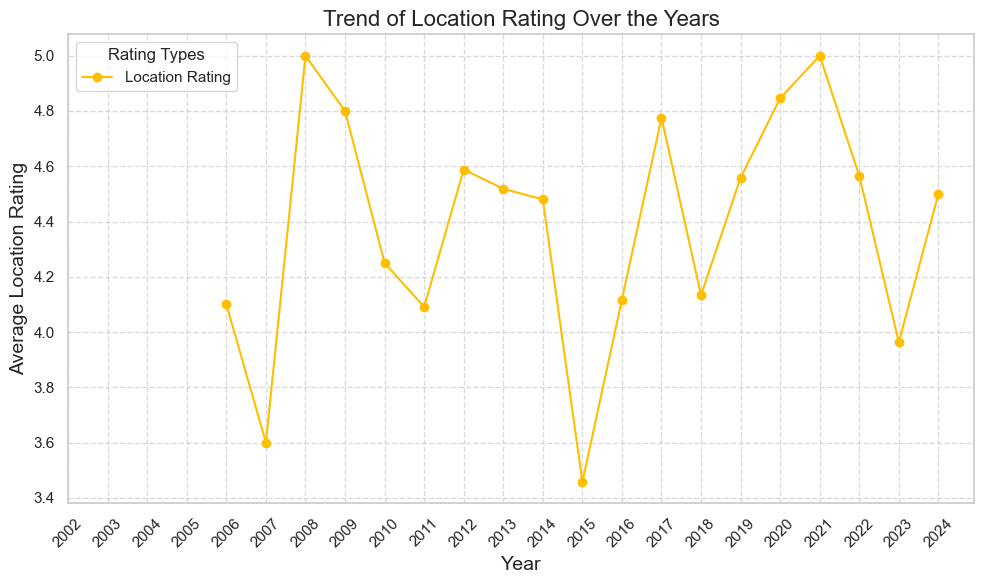

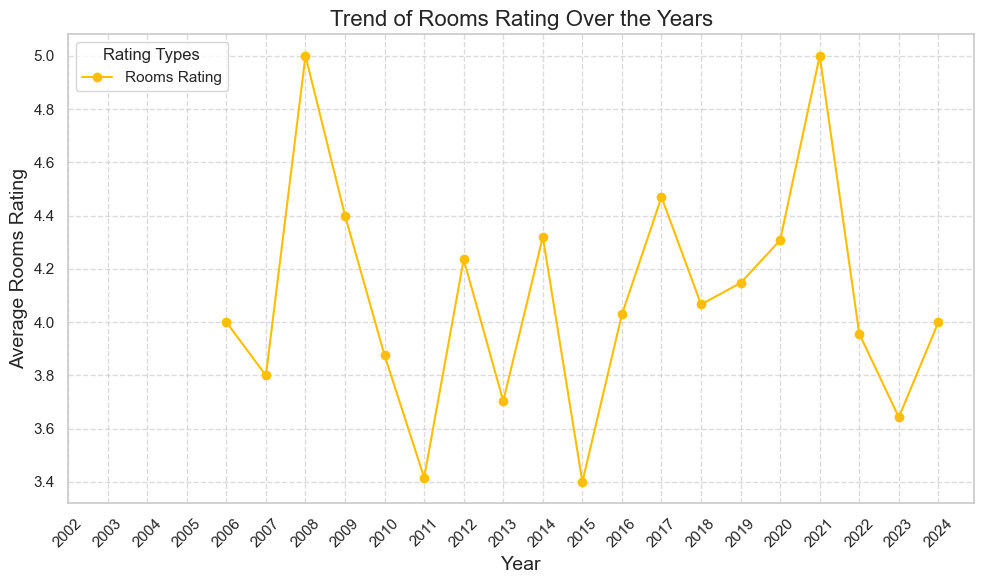

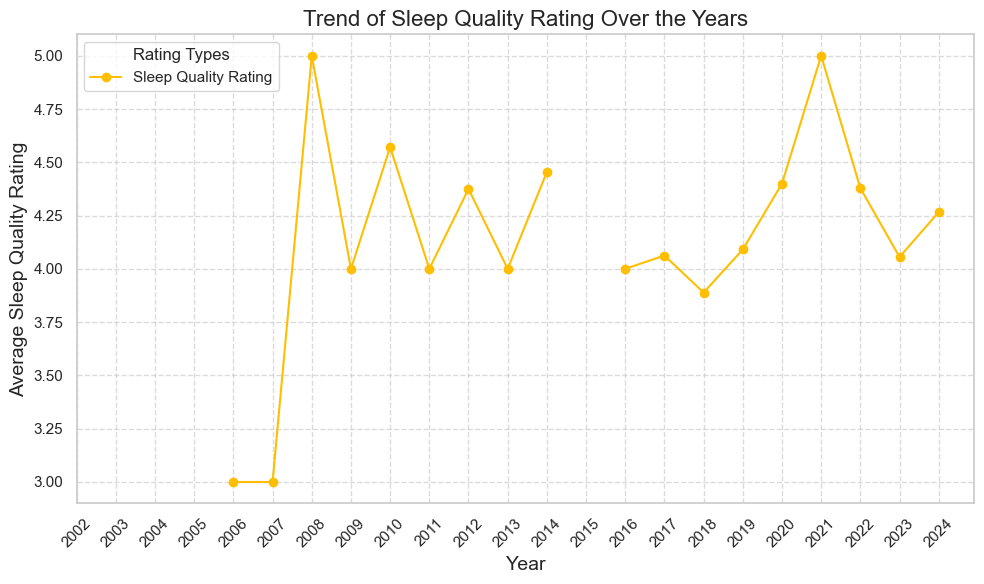

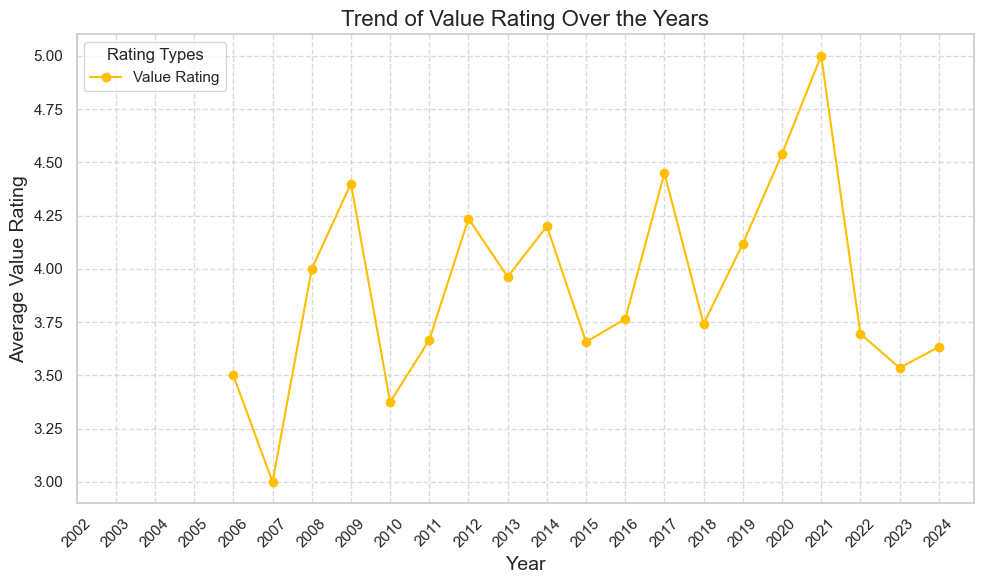

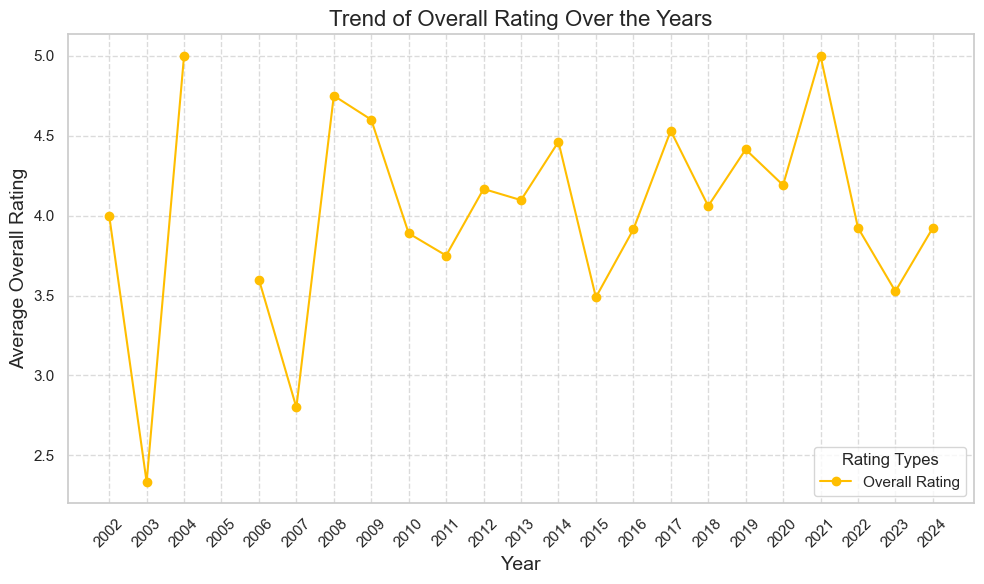

In [676]:
mean_ratings_per_year = df.groupby('Year')[rating_columns].mean()
if 2005 not in mean_ratings_per_year.index:
    new_row = pd.DataFrame([[np.nan] * len(rating_columns)], columns=rating_columns, index=[2005])
    mean_ratings_per_year = pd.concat([mean_ratings_per_year, new_row]).sort_index()
for idx, col in enumerate(rating_columns):
    plt.figure(figsize=(10, 6))
    plt.plot(mean_ratings_per_year.index, mean_ratings_per_year[col], 
             marker='o', color="#ffbe00", label=col)
    
    plt.title(f'Trend of {col} Over the Years', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(f'Average {col}', fontsize=14)
    plt.xticks(mean_ratings_per_year.index, rotation=45)  
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Rating Types') 
    plt.tight_layout() 
    plt.show()

In [677]:
def preprocess_text(text):
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'\d+', '', text) 
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words]) 
    return text
df['Cleaned Verbatim'] = df['Verbatim'].apply(lambda x: preprocess_text(str(x)))

/var/folders/8x/n5mjk3bs7tjc_2kc5wbk_ft00000gn/T/ipykernel_36788/2635406512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned Verbatim'] = df['Verbatim'].apply(lambda x: preprocess_text(str(x)))


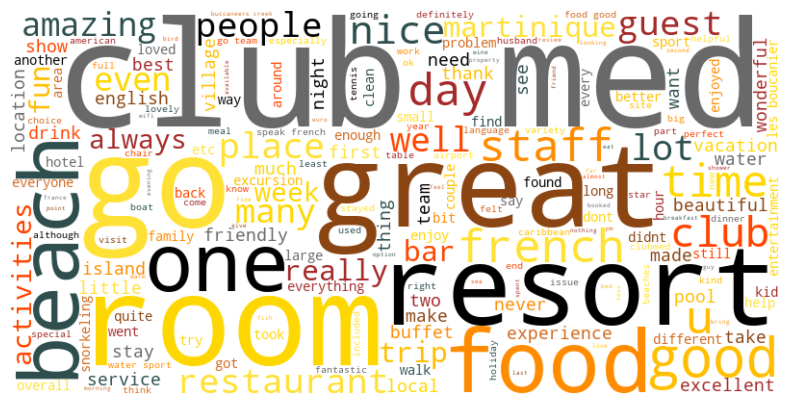

In [678]:
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = [
        '#ffbe00', '#ffd700', '#ffe135', '#ff8c00', 
        '#ff4500', '#8B4513', '#a52a2a', '#d2691e', 
        '#000000', '#696969', '#2f4f4f'
    ]
    return random.choice(colors)
text = ' '.join(df['Cleaned Verbatim'].dropna())


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    color_func=custom_color_func  
).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [679]:

theme_sentiments = defaultdict(list)
themes_columns = ['Booking & Pre-arrival', 'Arrival & Check-In', 'Room Experience', 'Service Experience', "Facilities & experiences", "Dining & Beverage", "Post-Stay & Retention"]

Sub-Themes with Most Sentiment Scores Above 50: [('Restaurants and dining (general)', 312), ('Staff friendly and helpful', 249), ('Dining (general)', 247), ('Quality of room', 166), ('Beverage (general)', 133), ('Bar and drinks', 133), ('First time visit', 70), ('Returning customers/plan to return', 69), ('Value for money', 67), ('Staff rude or unhelpful', 63)]


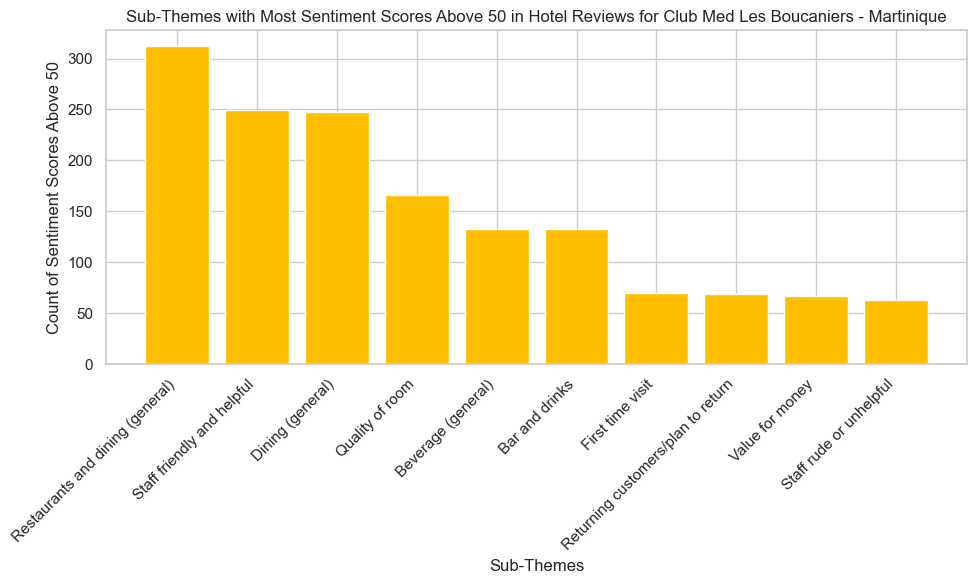

In [680]:
for column in themes_columns:
    if column in df.columns:  
        for index, theme_str in df[column].dropna().items():
            sentiment_score = df.at[index, 'Sentiment Score']
            sub_themes = theme_str.split('; ') 
            for sub_theme in sub_themes:
                theme_sentiments[sub_theme].append(sentiment_score)
high_sentiment_themes = {theme: scores for theme, scores in theme_sentiments.items() if any(score > 50 for score in scores)}
high_sentiment_counts = {theme: sum(1 for score in scores if score > 50) for theme, scores in high_sentiment_themes.items()}
sorted_high_sentiment_themes = sorted(high_sentiment_counts.items(), key=lambda item: item[1], reverse=True)
top_high_sentiment_themes = sorted_high_sentiment_themes[:10] 
print("Sub-Themes with Most Sentiment Scores Above 50:", top_high_sentiment_themes)

if top_high_sentiment_themes: 
    themes, counts = zip(*top_high_sentiment_themes)
    plt.figure(figsize=(10, 6))
    plt.bar(themes, counts, color='#ffbe00') 
    plt.title('Sub-Themes with Most Sentiment Scores Above 50 in Hotel Reviews for Club Med Les Boucaniers - Martinique')
    plt.xlabel('Sub-Themes')
    plt.ylabel('Count of Sentiment Scores Above 50')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout() 
    plt.show()
else:
    print("No themes with sentiment scores above 50 were found.")

Sub-Themes with Most Sentiment Scores Below 50: [('Restaurants and dining (general)', 130), ('Staff rude or unhelpful', 118), ('Dining (general)', 88), ('Quality of room', 62), ('Bar and drinks', 62), ('Value for money', 60), ('Beverage (general)', 58), ('Airport transfers', 36), ('Would not return', 28), ('dinner', 26)]


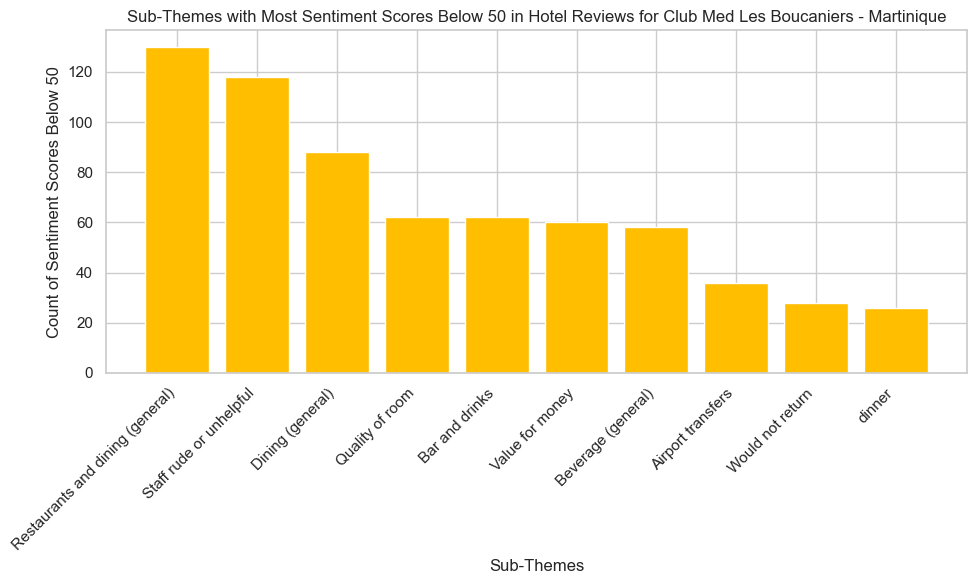

In [681]:

for column in themes_columns:
    if column in df.columns:  
        for index, theme_str in df[column].dropna().items():
            sentiment_score = df.at[index, 'Sentiment Score']
            sub_themes = theme_str.split('; ')  
            for sub_theme in sub_themes:
                theme_sentiments[sub_theme].append(sentiment_score)


low_sentiment_themes = {theme: scores for theme, scores in theme_sentiments.items() if any(score < 50 for score in scores)}
low_sentiment_counts = {theme: sum(1 for score in scores if score < 50) for theme, scores in low_sentiment_themes.items()}
sorted_low_sentiment_themes = sorted(low_sentiment_counts.items(), key=lambda item: item[1], reverse=True)
top_low_sentiment_themes = sorted_low_sentiment_themes[:10] 
print("Sub-Themes with Most Sentiment Scores Below 50:", top_low_sentiment_themes)


if top_low_sentiment_themes:  
    themes, counts = zip(*top_low_sentiment_themes)
    plt.figure(figsize=(10, 6))
    plt.bar(themes, counts, color='#ffbe00')  
    plt.title('Sub-Themes with Most Sentiment Scores Below 50 in Hotel Reviews for Club Med Les Boucaniers - Martinique')
    plt.xlabel('Sub-Themes')
    plt.ylabel('Count of Sentiment Scores Below 50')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()  
    plt.show()
else:
    print("No themes with sentiment scores below 50 were found.")


In [682]:
critical_keywords = ['emergency', 'dangerous', 'safety', 'health', 'urgent', 
                     'risk', 'hazard', 'alarm', 'warning', 'failure', 
                     'injury', 'threat', 'alert', 'malfunction', 
                     'contamination', 'crisis', 'toxic', 'poison', 
                     'rescue', 'medical', 'illness', 'surveillance', 
                     'vulnerable', 'defect', 'exposure', 'adverse']

def find_critical_complaints(text):
    return any(keyword in text.lower() for keyword in critical_keywords)
df['Critical_Complaint'] = df['Verbatim'].apply(find_critical_complaints)
critical_complaints = df[df['Critical_Complaint']]

analyzer = SentimentIntensityAnalyzer()
def detect_emotion(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] < -0.5: 
        return 'Anger/Frustration'
    return 'Neutral/Positive'
df['Emotion'] = df['Verbatim'].apply(detect_emotion)
frustration_comments = df[df['Emotion'] == 'Anger/Frustration']


def detect_negation(text):
    negation_words = ["not", "no", "never", "none", "haven't", "hasn't", "didn't",
                      "doesn't", "without", "cannot", "won't", "shouldn't", 
                      "wouldn't", "ain't", "neither", "nor", "neither", 
                      "never-ending", "no one", "nothing"]
    return any(negation in text.lower() for negation in negation_words)
df['Negation_Complaint'] = df['Verbatim'].apply(detect_negation)
negation_complaints = df[df['Negation_Complaint']]
strong_comments_df = pd.concat([critical_complaints[['Hotel Name', 'Verbatim','Sentiment Score','Booking & Pre-arrival', 'Arrival & Check-In', 'Room Experience', 
                'Service Experience', 'Facilities & Experiences', 'Dining & Beverage', 'Post-Stay & Retention']].assign(Comment_Type='Critical'),
                                frustration_comments[['Hotel Name', 'Verbatim','Sentiment Score','Booking & Pre-arrival', 'Arrival & Check-In', 'Room Experience', 
                'Service Experience', 'Facilities & Experiences', 'Dining & Beverage', 'Post-Stay & Retention']].assign(Comment_Type='Frustration'),
                                negation_complaints[['Hotel Name', 'Verbatim','Sentiment Score','Booking & Pre-arrival', 'Arrival & Check-In', 'Room Experience', 
                'Service Experience', 'Facilities & Experiences', 'Dining & Beverage', 'Post-Stay & Retention']].assign(Comment_Type='Negation')
], ignore_index=True)


/var/folders/8x/n5mjk3bs7tjc_2kc5wbk_ft00000gn/T/ipykernel_36788/472132381.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Critical_Complaint'] = df['Verbatim'].apply(find_critical_complaints)
/var/folders/8x/n5mjk3bs7tjc_2kc5wbk_ft00000gn/T/ipykernel_36788/472132381.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emotion'] = df['Verbatim'].apply(detect_emotion)
/var/folders/8x/n5mjk3bs7tjc_2kc5wbk_ft00000gn/T/ipykernel_36788/472132381.py:29: SettingWithCopyWarning: 
A value is trying to b

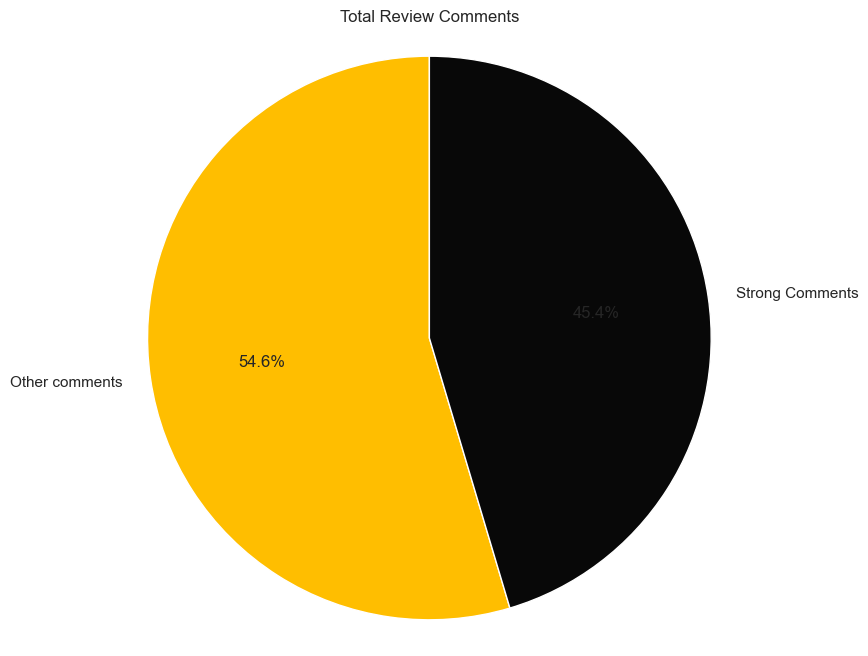

In [693]:
strong_comments_df['Complaint_ID'] = strong_comments_df['Hotel Name'] + '_' + strong_comments_df['Verbatim']
strong_comments_df.drop_duplicates(subset='Complaint_ID', inplace=True)
strong_comments_df.drop(columns='Complaint_ID', inplace=True)
total_reviews_original_df = len(df)  
total_reviews_strong_comments_df = len(strong_comments_df)


labels = ['Other comments', 'Strong Comments']
sizes = [total_reviews_original_df, total_reviews_strong_comments_df]
colors = ['#ffbe00', '#080808']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Total Review Comments')
plt.axis('equal')  
plt.show()

   Sentiment Score  Count
0                0     17
1               25     69
2               50     70
3               75    183
4              100    153


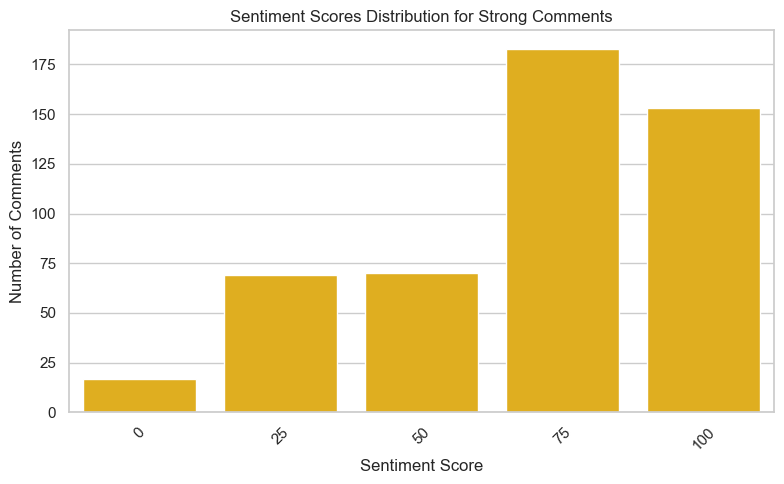

In [684]:
sentiment_counts_strong = strong_comments_df.groupby('Sentiment Score').size().reset_index(name='Count')
print(sentiment_counts_strong)

plt.figure(figsize=(8, 5))
sns.barplot(x='Sentiment Score', y='Count', data=sentiment_counts_strong, color="#ffbe00")
plt.title('Sentiment Scores Distribution for Strong Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [685]:
themes = ['Booking & Pre-arrival', 'Arrival & Check-In', 'Room Experience', 
          'Service Experience', 'Facilities & Experiences', 'Dining & Beverage', 'Post-Stay & Retention']

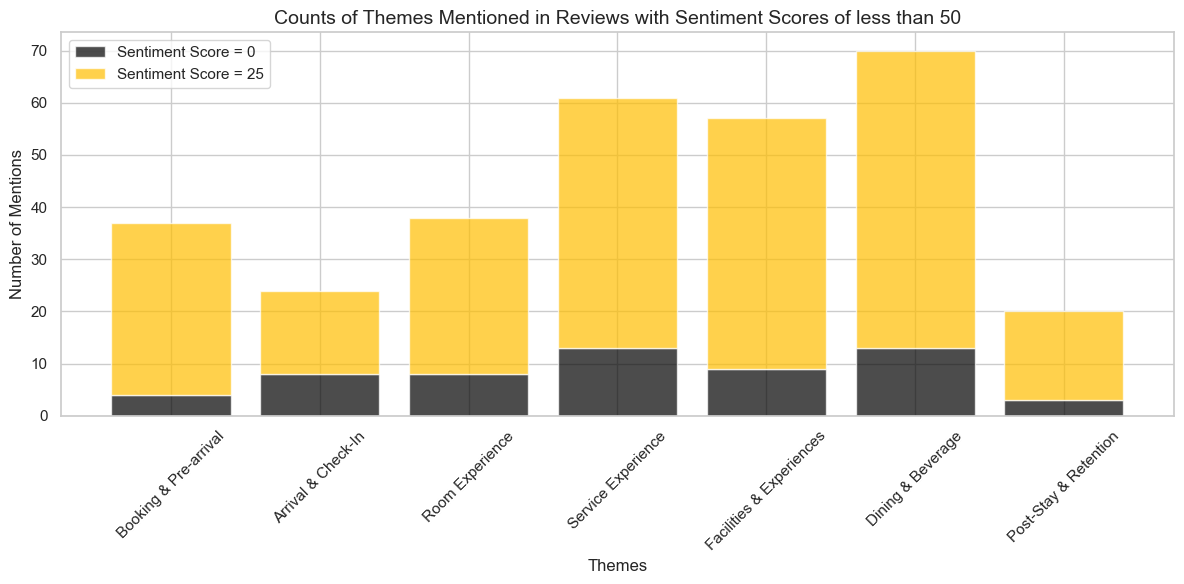

In [694]:
ss0_df = strong_comments_df[strong_comments_df['Sentiment Score'] == 0]
ss25_df = strong_comments_df[strong_comments_df['Sentiment Score'] == 25]
theme_counts = {}
for theme in themes:
    theme_counts[theme] = {'Score 0': ss0_df[theme].notnull().sum(), 
                            'Score 25': ss25_df[theme].notnull().sum()}

theme_counts_df = pd.DataFrame(theme_counts).T
theme_counts_df.reset_index(inplace=True)
theme_counts_df.columns = ['Theme', 'Count (Score 0)', 'Count (Score 25)']

plt.figure(figsize=(12, 6))
plt.bar(theme_counts_df['Theme'], theme_counts_df['Count (Score 0)'], 
        color='black', label='Sentiment Score = 0', alpha=0.7)
plt.bar(theme_counts_df['Theme'], theme_counts_df['Count (Score 25)'], 
        bottom=theme_counts_df['Count (Score 0)'], 
        color='#ffbe00', label='Sentiment Score = 25', alpha=0.7)
plt.title('Counts of Themes Mentioned in Reviews with Sentiment Scores of less than 50', fontsize=14)
plt.xlabel('Themes', fontsize=12)
plt.ylabel('Number of Mentions', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [687]:
strong_comments_df['Dining & Beverage'].value_counts()

Dining & Beverage
Restaurants and dining (general); Dining (general)                                          52
Dining (general); Restaurants and dining (general)                                          49
Restaurants and dining (general)                                                            45
Restaurants and dining (general); Bar and drinks                                             8
Restaurants and dining (general); Dining (general); Beverage (general)                       7
                                                                                            ..
lunch; Restaurants and dining (general); Dining (general); Beverage (general); Bar and d     1
Restaurants and dining (general); Beverage (general); Dining (general); dinner               1
Dining (general); lunch; Breakfast; dinner; Restaurants an                                   1
Breakfast; Restaurants and dining (general); Bar and drinks; Dining (general)                1
Dining (general); Bar and drinks

In [688]:
ss0_25_df = pd.concat([ss0_df, ss25_df], ignore_index=True)

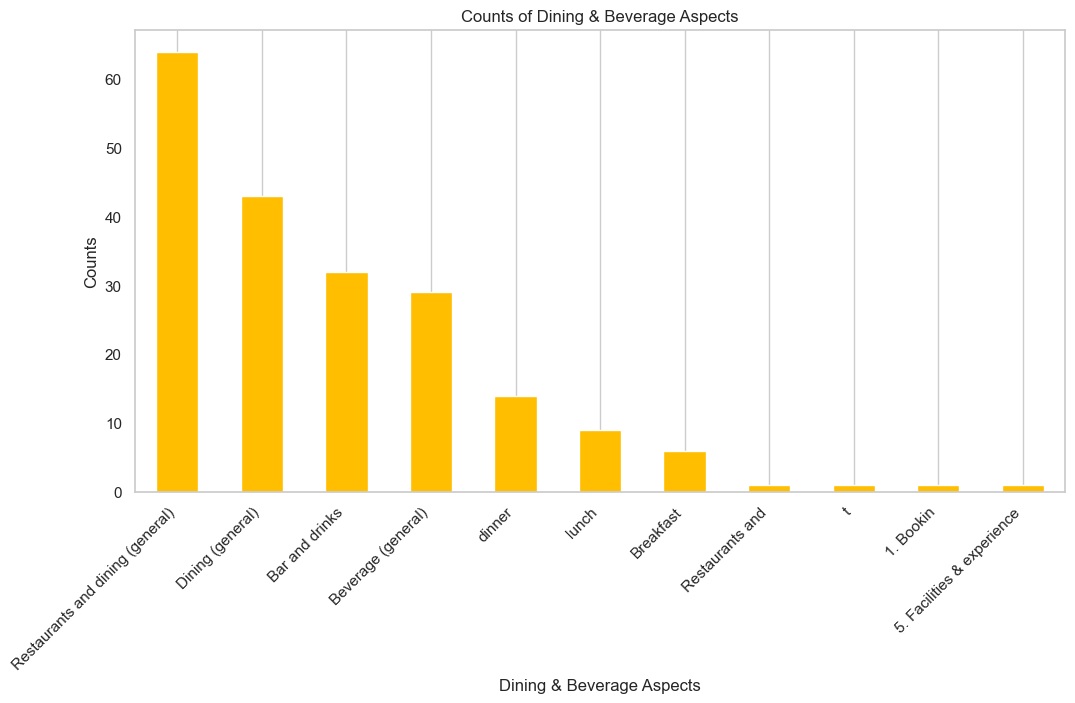

In [689]:
ss0_25_df = pd.concat([ss0_df, ss25_df], ignore_index=True)
def custom_split(text):
    if isinstance(text, str):
        return re.split(r';\s*', text) 
    else:
        return [] 
ss0_25_df['Dining & Beverage'] = ss0_25_df['Dining & Beverage'].apply(custom_split)
exploded_df = ss0_25_df.explode('Dining & Beverage')
exploded_df['Dining & Beverage'] = exploded_df['Dining & Beverage'].str.strip()
exploded_df = exploded_df[exploded_df['Dining & Beverage'].notnull() & (exploded_df['Dining & Beverage'] != '')]
room_experience_counts = exploded_df['Dining & Beverage'].value_counts()
plt.figure(figsize=(12, 6))
room_experience_counts.plot(kind='bar', color='#ffbe00')
plt.title('Counts of Dining & Beverage Aspects')
plt.xlabel('Dining & Beverage Aspects')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


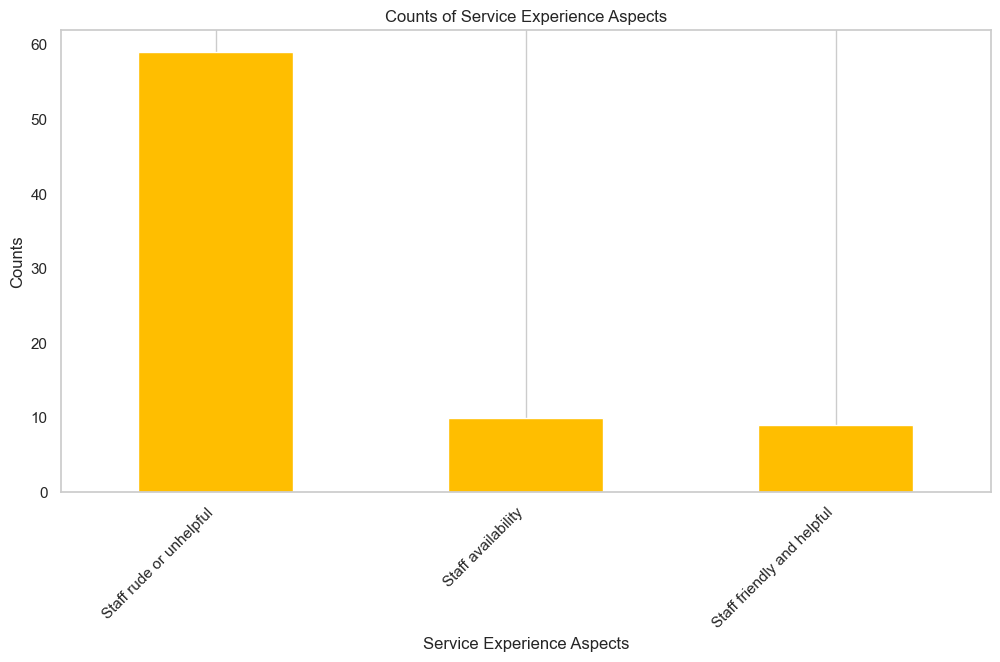

In [690]:
ss0_25_df = pd.concat([ss0_df, ss25_df], ignore_index=True)
def custom_split(text):
    if isinstance(text, str):
        return re.split(r';\s*', text) 
    else:
        return [] 
ss0_25_df['Service Experience'] = ss0_25_df['Service Experience'].apply(custom_split)
exploded_df = ss0_25_df.explode('Service Experience')
exploded_df['Service Experience'] = exploded_df['Service Experience'].str.strip()
exploded_df = exploded_df[exploded_df['Service Experience'].notnull() & (exploded_df['Service Experience'] != '')]
room_experience_counts = exploded_df['Service Experience'].value_counts()
plt.figure(figsize=(12, 6))
room_experience_counts.plot(kind='bar', color='#ffbe00')
plt.title('Counts of Service Experience Aspects')
plt.xlabel('Service Experience Aspects')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


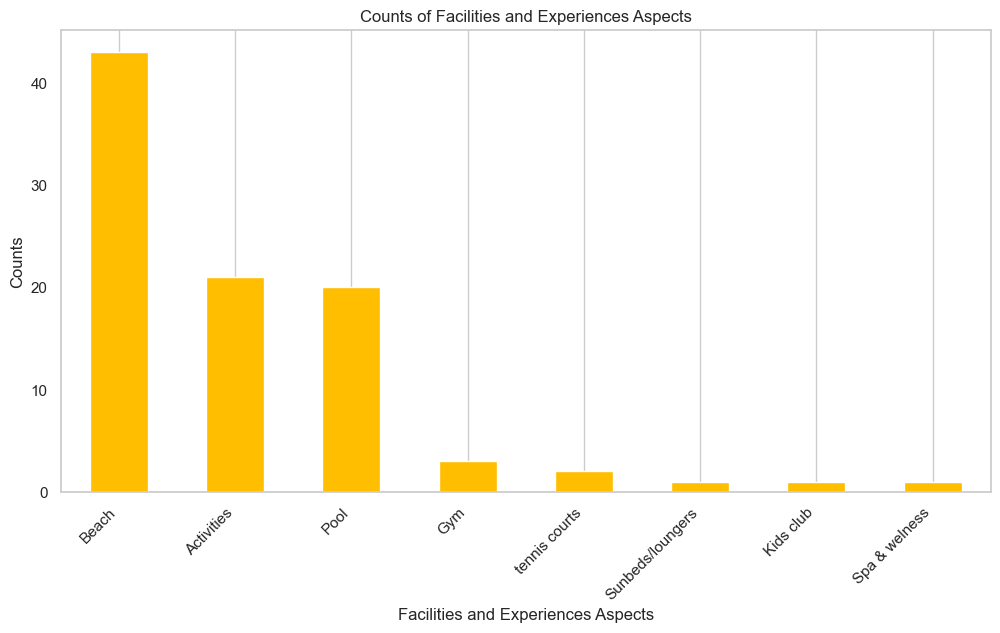

In [695]:
ss0_25_df = pd.concat([ss0_df, ss25_df], ignore_index=True)
def custom_split(text):
    if isinstance(text, str):
        return re.split(r';\s*', text) 
    else:
        return [] 
ss0_25_df['Facilities & Experiences'] = ss0_25_df['Facilities & Experiences'].apply(custom_split)
exploded_df = ss0_25_df.explode('Facilities & Experiences')
exploded_df['Facilities & Experiences'] = exploded_df['Facilities & Experiences'].str.strip()
exploded_df = exploded_df[exploded_df['Facilities & Experiences'].notnull() & (exploded_df['Facilities & Experiences'] != '')]
room_experience_counts = exploded_df['Facilities & Experiences'].value_counts()
plt.figure(figsize=(12, 6))
room_experience_counts.plot(kind='bar', color='#ffbe00')
plt.title('Counts of Facilities and Experiences Aspects')
plt.xlabel('Facilities and Experiences Aspects')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()